In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
import pytz
import numpy as np
import requests
import datetime as dt
import time 
from datetime import datetime
import datetime
from pandas.plotting import register_matplotlib_converters
import scipy.stats as ss

#1  Coastal Endurance - Oregon Shelf Surface Mooring - Surface Buoy - Bulk Meteorology Instrument Package

#2  Coastal Endurance - Oregon Offshore Surface Mooring - Surface Buoy - Bulk Meteorology Instrument Package

Delivery method = telemetered

period = 2018-05-05  -  2019-05-05 



In [102]:
USERNAME ='OOIAPI-XB0026T6O2QKW0'
TOKEN= '11PASC6B78F'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [103]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600 #Coordinated Universal Time is 8 hours ahead of Pacific Time

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

Data From:

OSSM=Oregon Shelf Surface Mooring

OOSM=Oregon Offshore Surface Mooring

In [104]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-05-05T00:31:20.712Z&endDT=2019-05-05T00:31:20.712Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-05-05T04:33:58.629Z&endDT=2019-05-05T04:33:58.629Z&limit=1000']






Storing vlaues for velocity, precipitation, and time

In [105]:
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

Function for average time, velocity, and precipitation for each month

In [106]:
def Average(time,velocity,precipitation):
    
    May_velocity = []
    June_velocity = []
    July_velocity = []
    Aug_velocity = []
    Sept_velocity = []
    Oct_velocity = []
    Nov_velocity = []
    Dec_velocity = []
    Jan_velocity = []
    Feb_velocity = []
    March_velocity = []
    April_velocity = []

    
    May_precipitation = []
    June_precipitation = []
    July_precipitation = []
    Aug_precipitation = []
    Sept_precipitation = []
    Oct_precipitation = []
    Nov_precipitation = []
    Dec_precipitation = []
    Jan_precipitation = []
    Feb_precipitation = []
    March_precipitation = []
    April_precipitation = []
    
    avg_velocity = []
    avg_precipitation = []
    Months = ['May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December',
              'January',
              'February',
              'March',
              'April',]

    for i in range(len(time)):
        if i <= int(round(len(time)/12)):
            May_velocity.append(velocity[i])
            May_precipitation.append(precipitation[i])
        elif i > int(round(len(time)/12)) and i <= 2*int(round(len(time)/12)):
            June_velocity.append(velocity[i])
            June_precipitation.append(precipitation[i])
        elif i > 2*int(round(len(time)/12)) and i <= 3*int(round(len(time)/12)):
            July_velocity.append(velocity[i])
            July_precipitation.append(precipitation[i])
        elif i > 3*int(round(len(time)/12)) and i <= 4*int(round(len(time)/12)):
            Aug_velocity.append(velocity[i])
            Aug_precipitation.append(precipitation[i])
        elif i > 4*int(round(len(time)/12)) and i <= 5*int(round(len(time)/12)):
            Sept_velocity.append(velocity[i])
            Sept_precipitation.append(precipitation[i])
        elif i > 5*int(round(len(time)/12)) and i <= 6*int(round(len(time)/12)):
            Oct_velocity.append(velocity[i])
            Oct_precipitation.append(precipitation[i])
        elif i > 6*int(round(len(time)/12)) and i <= 7*int(round(len(time)/12)):
            Nov_velocity.append(velocity[i])
            Nov_precipitation.append(precipitation[i])
        elif i > 7*int(round(len(time)/12)) and i <= 8*int(round(len(time)/12)):
            Dec_velocity.append(velocity[i])
            Dec_precipitation.append(precipitation[i])
        elif i > 8*int(round(len(time)/12)) and i <= 9*int(round(len(time)/12)):
            Jan_velocity.append(velocity[i])
            Jan_precipitation.append(precipitation[i])
        elif i > 9*int(round(len(time)/12)) and i <= 10*int(round(len(time)/12)):
            Feb_velocity.append(velocity[i])
            Feb_precipitation.append(precipitation[i])
        elif i > 10*int(round(len(time)/12)) and i <= 11*int(round(len(time)/12)):
            March_velocity.append(velocity[i])
            March_precipitation.append(precipitation[i])
        elif i > 11*int(round(len(time)/12)):
            April_velocity.append(velocity[i])
            April_precipitation.append(precipitation[i])

    avg_velocity.append(np.mean(May_velocity))
    avg_velocity.append(np.mean(June_velocity))
    avg_velocity.append(np.mean(July_velocity))
    avg_velocity.append(np.mean(Aug_velocity))
    avg_velocity.append(np.mean(Sept_velocity))
    avg_velocity.append(np.mean(Oct_velocity))
    avg_velocity.append(np.mean(Nov_velocity))
    avg_velocity.append(np.mean(Dec_velocity))
    avg_velocity.append(np.mean(Jan_velocity))
    avg_velocity.append(np.mean(Feb_velocity))
    avg_velocity.append(np.mean(March_velocity))
    avg_velocity.append(np.mean(April_velocity))
    
    avg_precipitation.append(np.mean(May_precipitation))
    avg_precipitation.append(np.mean(June_precipitation))
    avg_precipitation.append(np.mean(July_precipitation))
    avg_precipitation.append(np.mean(Aug_precipitation))
    avg_precipitation.append(np.mean(Sept_precipitation))
    avg_precipitation.append(np.mean(Oct_precipitation))
    avg_precipitation.append(np.mean(Nov_precipitation))
    avg_precipitation.append(np.mean(Dec_precipitation))
    avg_precipitation.append(np.mean(Jan_precipitation))
    avg_precipitation.append(np.mean(Feb_precipitation))
    avg_precipitation.append(np.mean(March_precipitation))
    avg_precipitation.append(np.mean(April_precipitation)) 
    
    return Months,avg_velocity,avg_precipitation

Oregon Shelf Surface Mooring - Surface Buoy


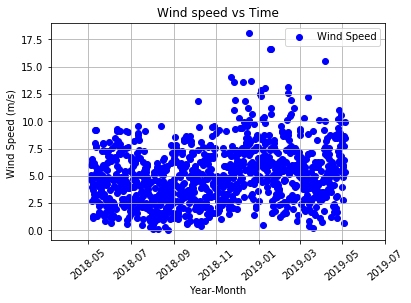

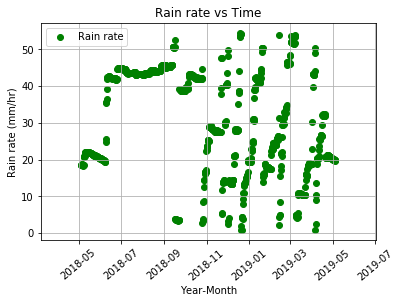

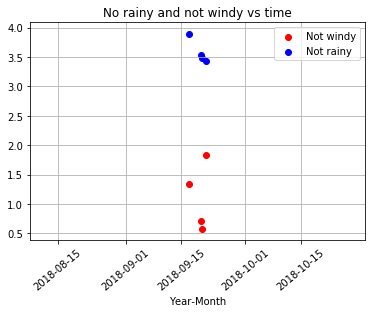

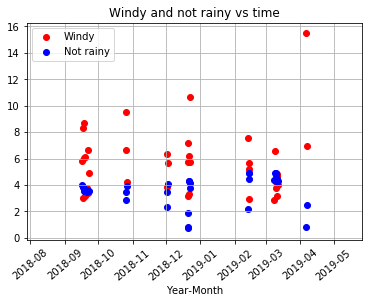

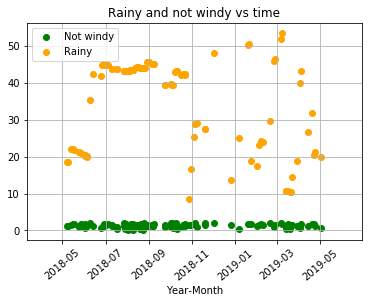

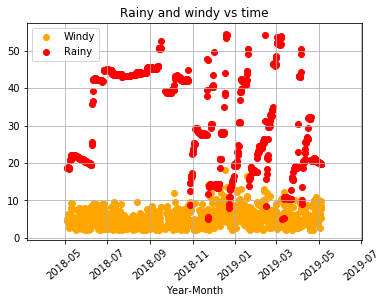

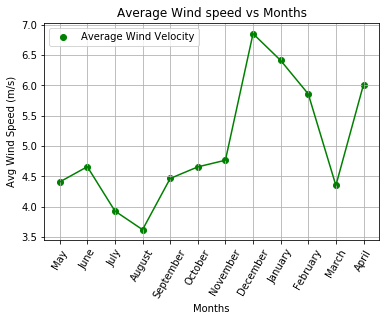

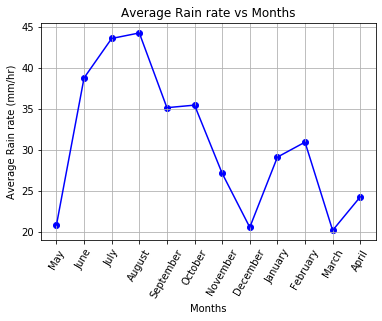

Oregon Offshore Surface Mooring - Surface Buoy


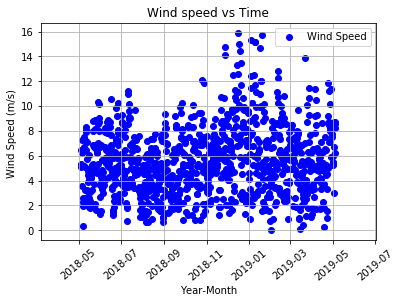

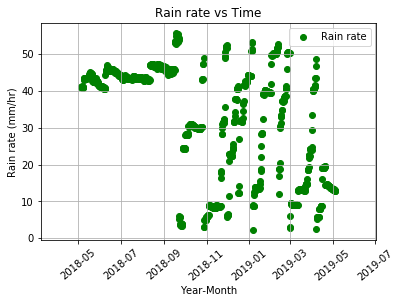

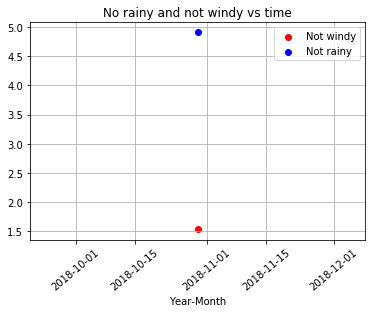

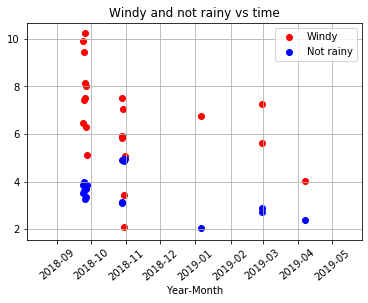

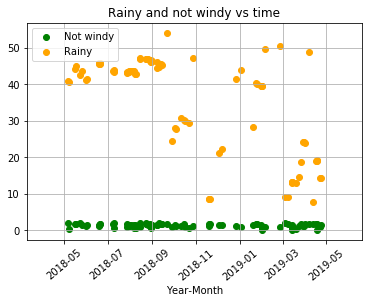

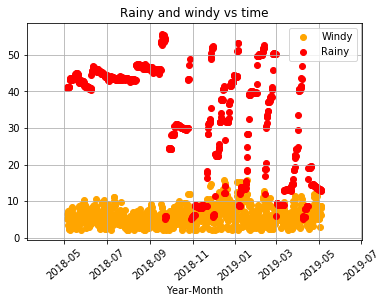

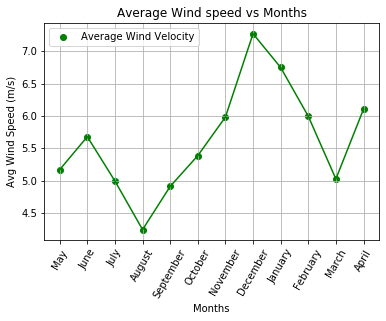

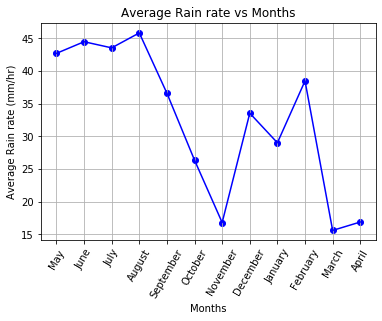

In [107]:
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    if i == 0:
        print("Oregon Shelf Surface Mooring - Surface Buoy")
    elif i==1:
        print("Oregon Offshore Surface Mooring - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        #resultant velocity
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
          
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: No rainy and not windy
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: Windy and not rainy
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rainy and not windy
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rainy and Windy
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: No rainy and not windy
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: Windy and not rainy
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rainy and not windy
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rainy and Windy
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
            
    # wind speed vs time
    plt.scatter(time,velocity, color= 'blue',label = 'Wind Speed')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Wind Speed (m/s) ')
    plt.title('Wind speed vs Time')
    plt.grid(True)
    plt.show()
    
    # rain rate vs time
    plt.scatter(time,precipitation, color='green',label = 'Rain rate')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Rain rate (mm/hr)')
    plt.title('Rain rate vs Time')
    plt.grid(True)
    plt.show()
    
    
    # not windy not rainy vs time
    plt.scatter(time1,velocity1,color = 'red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('No rainy and not windy vs time')
    plt.grid(True)
    plt.show()
   
    
    # not rainy and windy vs time
    plt.scatter(time2,velocity2,color = 'red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Windy and not rainy vs time')
    plt.grid(True)
    plt.show()
    
    # Rainy and not windy vs time
    plt.scatter(time3,velocity3,color = 'green',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'orange',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and not windy vs time')
    plt.grid(True)
    plt.show()
    
    # rainy and windy vs time
    plt.scatter(time4,velocity4,color = 'orange', label='Windy')
    plt.scatter(time4,precipitation4,color = 'red',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and windy vs time')
    plt.grid(True)
    plt.show()
    
    
    #   ------------  The monthly average of the wind speed and rain ratefor each site ----------------
    
    #calling a Average function
    avg = Average(time,velocity,precipitation)
    
    #divide by the average to normalize
    mean_vel=np.mean(velocity)
    mean_precipitate=np.mean(precipitation)
    # From return
    # 0=Months
    # 1= Wind Velocity
    # 2= Rain rate
    plt.scatter(avg[0],avg[1],color='green',label = 'Average Wind Velocity')
    plt.plot(avg[0],avg[1],color='green')
    plt.legend()
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Avg Wind Speed (m/s)')
    plt.title('Average Wind speed vs Months')
    plt.grid(True)
    plt.show()
    
    plt.scatter(avg[0],avg[2],color='blue',label = 'Average Rain rate')
    plt.plot(avg[0],avg[2],color='blue')
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Average Rain rate (mm/hr)')
    plt.title('Average Rain rate vs Months')
    plt.grid(True)
    plt.show()

    

The cross-correlation function between wind speed at both sites

max correlation is 0.6374624304694766 at lag 0 ,which is equal to 0.0 days


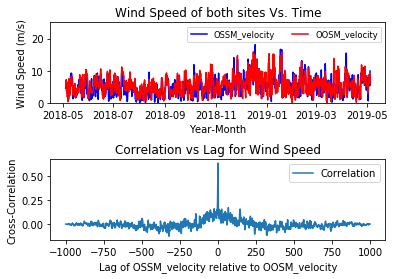

In [108]:
OSSM_velocity = np.asarray(OSSM_velocity)
OSSM_velocity[isnan(OSSM_velocity)] = 0

OOSM_velocity = np.asarray(OOSM_velocity)
OOSM_velocity[isnan(OOSM_velocity)] = 0

y1 = OSSM_velocity
y2 = OOSM_velocity

x = OSSM_time

lags = np.arange(-len(y1)+1 , len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=3)

ax = axs[0]
ax.plot(x, y1, 'b', label='OSSM_velocity')
ax.plot(x, y2, 'r', label='OOSM_velocity')
ax.set_ylim(0, 25)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Wind Speed of both sites Vs. Time')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Year-Month')


ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of OSSM_velocity relative to OOSM_velocity')
ax.set_title('Correlation vs Lag for Wind Speed')

plt.subplots_adjust(hspace=.7)
maxccor = np.max(ccor)
maxlag = lags[np.argmax(ccor)]
days = (maxlag/len(time))*365 #take the ratio and multiply by days in a year
print("max correlation is",str(maxccor),"at lag",maxlag,",""which is equal to",round(days),"days")


The cross-correlation function between rain rate at both sites

max correlation is 0.39475420977208875 lag at 55 ,which is equal to 20.0 days


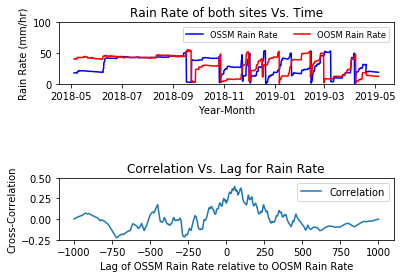

In [115]:
y1 = np.asarray(OSSM_precipitation) # y1= oregon Shelf surface
y2 = np.asarray(OOSM_precipitation)  # y2 = oregon offshore surface

x = OSSM_time

lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())


fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=1.5)
ax = axs[0]
ax.plot(x, y1, 'b', label='OSSM Rain Rate')
ax.plot(x, y2, 'r', label='OOSM Rain Rate')
ax.set_ylim(0, 100)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Rain Rate of both sites Vs. Time')
ax.set_ylabel('Rain Rate (mm/hr)')
ax.set_xlabel('Year-Month')

ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylim(-.25, .5)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of OSSM Rain Rate relative to OOSM Rain Rate')
ax.set_title('Correlation Vs. Lag for Rain Rate')

plt.subplots_adjust(hspace=1.5)

maxlag = lags[np.argmax(ccor)]
maxccor = np.max(ccor)
days = (maxlag/len(time))*365 #take the ratio and multiply by days in a year
print("max correlation is", str(maxccor),"lag at", maxlag,",""which is equal to",round(days),"days")

